---
title: "AM"
format: 
  html: 
    toc: true
    css: styles.css
    echo: false
jupyter: python3
execute:
  echo: false # Hides all code globally
---

In [16]:
import openmatrix as omx
import numpy as np
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# User Inptus

In [3]:
# scenario paths
scenarioOnePath = r'T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1521_2'          # EMME OpenPaths
scenarioTwoPath = r'T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2'     # EMME 4.3.7

# desired matrix
matrix = 'transit_skims_AM.omx'

# desired sub matrices
sub_matrices = [
    'WALK_PRM_TOTALIVTT__AM'
    ,'WALK_PRM_LRTIVTT__AM'
    ,'WALK_PRM_CMRIVTT__AM'
    ,'WALK_PRM_EXPIVTT__AM'
    ,'WALK_PRM_LTDEXPIVTT__AM'
    ,'WALK_PRM_BRTIVTT__AM'
    ]

In [4]:
# create paths to read
skimFileOne = os.path.join(scenarioOnePath, 'output', 'skims', matrix) # EMME OpenPaths
skimFileTwo = os.path.join(scenarioTwoPath, 'output', 'skims', matrix) # EMME 4.3.7
print('EMME OpenPath: ' + skimFileOne)
print('EMME 4.3.7: ' + skimFileTwo)

EMME OpenPath: T:\STORAGE-63T\ABM3_EMME_upgrade\2022_v1521_2\output\skims\transit_skims_AM.omx
EMME 4.3.7: T:\STORAGE-63T\2025RP_draft\abm_runs_v2\2022_S0_v2\output\skims\transit_skims_AM.omx


In [5]:
# compare function
def skimReader(inSkim):

    # read skim
    skims = omx.open_file(inSkim)
    zones = list(skims.mapping('zone_number').keys())

    # empty df with all zone-to-zone combinations
    zoneToZone = pd.DataFrame(list(itertools.product(list(range(1,4947+1,1)), repeat=2)))
    zoneToZone.columns = ['Origin', 'Destination']

    # read sub-matrices, convert from wide to long, and merge
    for sub_matrix in sub_matrices:
        od = pd.DataFrame(
            np.array(skims[sub_matrix]),
            zones,
            zones,
            )
        od = od.stack().reset_index().set_axis('Origin Destination {}'.format(sub_matrix).split(), axis=1)
        zoneToZone = zoneToZone.merge(od, on=['Origin', 'Destination'])
    
    return(zoneToZone)

In [6]:
# generate comparison
scenarioOne = skimReader(skimFileOne)
scenarioTwo = skimReader(skimFileTwo)

# OpenPaths minus EMME4.3.7 (exclude Origin and Destination columns)
comparison = scenarioOne.set_index(['Origin', 'Destination']) - scenarioTwo.set_index(['Origin','Destination'])
comparison.reset_index(inplace=True)

# Scatterplot Comparison of AM Peak for WALK PRM modes assignment

Scatterplot comparison of AM Peak total actual in-vehicle travel time by walk premium

Intercept: -0.0042
Slope: 1.0089
R² Score: 0.9996
RMSE: 0.5449


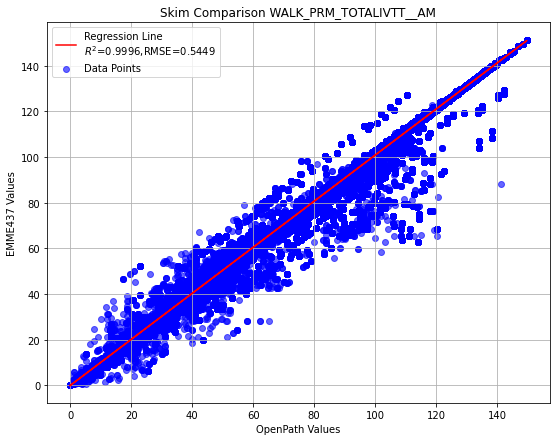

In [18]:
OpenPath_values = scenarioOne['WALK_PRM_TOTALIVTT__AM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_TOTALIVTT__AM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_TOTALIVTT__AM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of AM Peak actual in-vehicle travel time on LRT mode by walk premium

Intercept: 0.0047
Slope: 0.9989
R² Score: 0.9985
RMSE: 0.4813


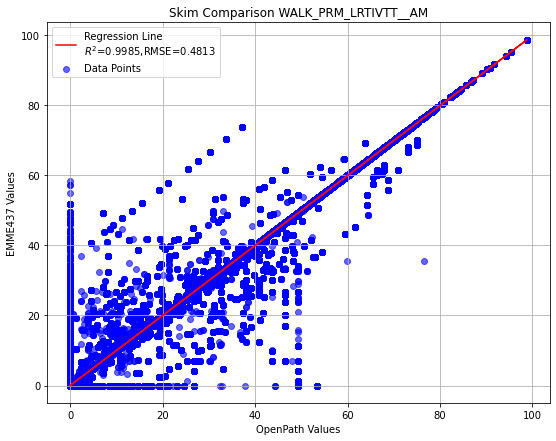

In [19]:
OpenPath_values = scenarioOne['WALK_PRM_LRTIVTT__AM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_LRTIVTT__AM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_LRTIVTT__AM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of AM Peak actual in-vehicle travel time on commuter rail mode by walk premium

Intercept: 0.0170
Slope: 1.0006
R² Score: 0.9889
RMSE: 0.8197


c:\Users\sxu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


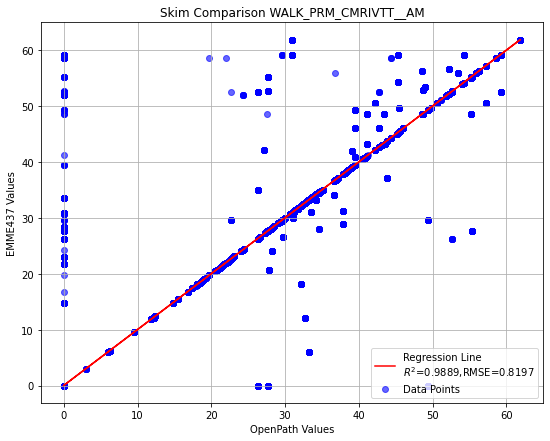

In [20]:
OpenPath_values = scenarioOne['WALK_PRM_CMRIVTT__AM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_CMRIVTT__AM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_CMRIVTT__AM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of AM Peak actual in-vehicle travel time on express bus mode by walk premium

Intercept: -0.0005
Slope: 1.0174
R² Score: 0.9960
RMSE: 0.4244


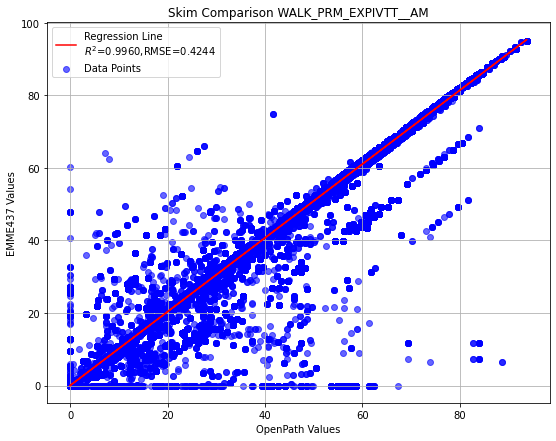

In [23]:
OpenPath_values = scenarioOne['WALK_PRM_EXPIVTT__AM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_EXPIVTT__AM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_EXPIVTT__AM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Scatterplot comparison of AM Peak actual in-vehicle travel time on BRT mode by walk premium

Intercept: 0.0024
Slope: 1.0134
R² Score: 0.9953
RMSE: 1.0627


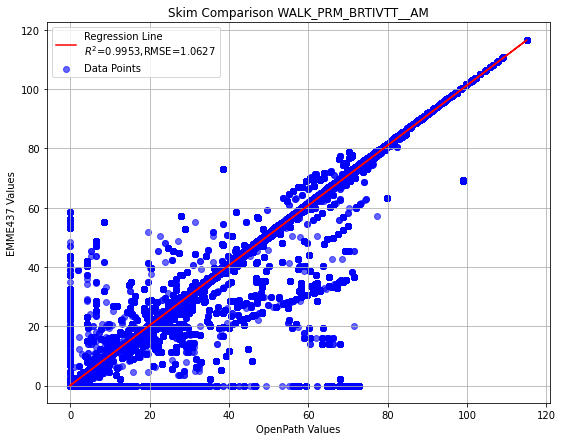

In [24]:
OpenPath_values = scenarioOne['WALK_PRM_BRTIVTT__AM'].values.reshape(-1, 1)
EMME437_values = scenarioTwo['WALK_PRM_BRTIVTT__AM']

# Fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(OpenPath_values, EMME437_values)
y_pred = lin_reg.predict(OpenPath_values)

# Compute R² score and Root Mean Squared Error (RMSE)
r2 = r2_score(EMME437_values, y_pred)
rmse = np.sqrt(mean_squared_error(EMME437_values, y_pred))

# Output regression parameters
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

plt.figure(figsize=(9, 7))
plt.scatter(OpenPath_values, EMME437_values, color='blue', alpha=0.6, label="Data Points")
plt.plot(OpenPath_values, y_pred, color='red', label=f"Regression Line\n$R^2$={r2:.4f},RMSE={rmse:.4f}")

# Labels and title
plt.xlabel("OpenPath Values")
plt.ylabel("EMME437 Values")
plt.title("Skim Comparison WALK_PRM_BRTIVTT__AM")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Summary of transit AM skim comparison (EMME OpenPath - EMME 4.3.7)

To display the top 5 rows of skim comparison (sort by WALK_PRM_TOTALIVTT__AM)

In [7]:
comparison.sort_values(by='WALK_PRM_TOTALIVTT__AM', ascending=False).head()

,Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_LTDEXPIVTT__AM,WALK_PRM_BRTIVTT__AM
9557715,1933,112,54.858345,36.613960,-58.569801,8.958151,0.0,67.856041
18526643,3746,129,53.270271,41.137993,-52.618427,0.000000,0.0,64.750702
9557717,1933,114,52.000191,33.755806,-58.569801,8.958151,0.0,67.856041
9557741,1933,138,52.000191,33.755806,-58.569801,8.958151,0.0,67.856041
9557734,1933,131,52.000191,33.755806,-58.569801,8.958151,0.0,67.856041


Below is the summary of select matrices difference in transit AM skim

In [8]:
comparison.WALK_PRM_TOTALIVTT__AM.describe()

count    2.447281e+07
mean    -1.064998e-01
std      5.955780e-01
min     -2.940382e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.485835e+01
Name: WALK_PRM_TOTALIVTT__AM, dtype: float64

In [9]:
comparison.WALK_PRM_LRTIVTT__AM.describe()

count    2.447281e+07
mean     8.186434e-04
std      4.815150e-01
min     -5.835030e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.338018e+01
Name: WALK_PRM_LRTIVTT__AM, dtype: float64

In [10]:
comparison.WALK_PRM_CMRIVTT__AM.describe()

count    2.447281e+07
mean    -1.784287e-02
std      8.196720e-01
min     -5.923640e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.932776e+01
Name: WALK_PRM_CMRIVTT__AM, dtype: float64

In [11]:
comparison.WALK_PRM_EXPIVTT__AM.describe()

count    2.447281e+07
mean    -2.242007e-02
std      4.397088e-01
min     -6.031083e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.198775e+01
Name: WALK_PRM_EXPIVTT__AM, dtype: float64

In [12]:
comparison.WALK_PRM_LTDEXPIVTT__AM.describe()

count    24472809.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0
Name: WALK_PRM_LTDEXPIVTT__AM, dtype: float64

In [13]:
comparison.WALK_PRM_BRTIVTT__AM.describe()

count    2.447281e+07
mean    -6.705556e-02
std      1.082002e+00
min     -5.845330e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.282273e+01
Name: WALK_PRM_BRTIVTT__AM, dtype: float64

Let's check the records with difference in WALK_PRM_LRTIVTT__AM greater than 50

In [14]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']>50]

,Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_LTDEXPIVTT__AM,WALK_PRM_BRTIVTT__AM
195296,40,2364,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
195330,40,2398,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
195352,40,2420,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
195368,40,2436,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
195458,40,2526,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
210137,43,2364,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
210171,43,2398,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
210193,43,2420,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
210209,43,2436,9.995773,53.38018,-59.236397,0.0,0.0,15.851995
210299,43,2526,9.995773,53.38018,-59.236397,0.0,0.0,15.851995


Let's check the records with difference in WALK_PRM_LRTIVTT__AM less than -50

In [15]:
comparison.loc[comparison['WALK_PRM_LRTIVTT__AM']<-50]

,Origin,Destination,WALK_PRM_TOTALIVTT__AM,WALK_PRM_LRTIVTT__AM,WALK_PRM_CMRIVTT__AM,WALK_PRM_EXPIVTT__AM,WALK_PRM_LTDEXPIVTT__AM,WALK_PRM_BRTIVTT__AM
12992011,2627,1190,2.965683,-51.902805,0.0,54.868488,0.0,0.0
12992020,2627,1199,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13061269,2641,1190,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13061278,2641,1199,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13105792,2650,1190,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13105801,2650,1199,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13417453,2713,1190,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13417462,2713,1199,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13481764,2726,1190,2.965683,-51.902805,0.0,54.868488,0.0,0.0
13481773,2726,1199,2.965683,-51.902805,0.0,54.868488,0.0,0.0


To investigate more for OD:
origin = 2627
destination = 1190

In [16]:
# set origin and destination TAZs
o = 2627
d = 1190

In [17]:
print('OpenPaths: ' + str(scenarioOne.loc[(scenarioOne['Origin']==o) & (scenarioOne['Destination']==d), 'WALK_PRM_TOTALIVTT__AM']) + '\n')
print('EMME437: ' + str(scenarioTwo.loc[(scenarioOne['Origin']==o) & (scenarioTwo['Destination']==d), 'WALK_PRM_TOTALIVTT__AM']))

OpenPaths: 12992011    54.868488
Name: WALK_PRM_TOTALIVTT__AM, dtype: float64

EMME437: 12992011    51.902805
Name: WALK_PRM_TOTALIVTT__AM, dtype: float64


In [18]:
print('OpenPaths: ' + str(scenarioOne.loc[(scenarioOne['Origin']==o) & (scenarioOne['Destination']==d), 'WALK_PRM_LRTIVTT__AM']) + '\n')
print('EMME437: ' + str(scenarioTwo.loc[(scenarioOne['Origin']==o) & (scenarioTwo['Destination']==d), 'WALK_PRM_LRTIVTT__AM']))

OpenPaths: 12992011    0.0
Name: WALK_PRM_LRTIVTT__AM, dtype: float64

EMME437: 12992011    51.902805
Name: WALK_PRM_LRTIVTT__AM, dtype: float64


In [19]:
print('OpenPaths: ' + str(scenarioOne.loc[(scenarioOne['Origin']==o) & (scenarioOne['Destination']==d), 'WALK_PRM_EXPIVTT__AM']) + '\n')
print('EMME437: ' + str(scenarioTwo.loc[(scenarioOne['Origin']==o) & (scenarioTwo['Destination']==d), 'WALK_PRM_EXPIVTT__AM']))

OpenPaths: 12992011    54.868488
Name: WALK_PRM_EXPIVTT__AM, dtype: float64

EMME437: 12992011    0.0
Name: WALK_PRM_EXPIVTT__AM, dtype: float64


In [24]:
# choose sub-matrix
sub_matrix_number = 0 # see below for specific sub_marix number
n_largest = 25

sub_matrix = [
    'WALK_PRM_TOTALIVTT__AM'     # 0
    ,'WALK_PRM_BRTIVTT__AM'      # 1
    ,'WALK_PRM_CMRIVTT__AM'      # 2
    ,'WALK_PRM_EXPIVTT__AM'      # 3
    ,'WALK_PRM_LRTIVTT__AM'      # 4
    ,'WALK_PRM_LTDEXPIVTT__AM'   # 5
]

# choose N largest
print('Choosing top ' + str(n_largest) + ' of ' + str(sub_matrix[sub_matrix_number]))
comparison.nsmallest(n_largest, sub_matrix[0])[['Origin', 'Destination', sub_matrix[sub_matrix_number]]].sort_values(by=sub_matrix[sub_matrix_number], ascending=False)

Choosing top 25 of WALK_PRM_TOTALIVTT__AM


,Origin,Destination,WALK_PRM_TOTALIVTT__AM
9396345,1900,1993,-23.932478
9228205,1866,2051,-24.288067
16025496,3240,2164,-25.086941
9015424,1823,1991,-29.388523
9015422,1823,1989,-29.388523
9015322,1823,1889,-29.397804
9015273,1823,1840,-29.397804
9015065,1823,1632,-29.397804
9015057,1823,1624,-29.397804
9015428,1823,1995,-29.400978
